# Install OpenCV & Other Library

In [ ]:
!pip install opencv-python opencv-python-headless numpy matplotlib

# import library

In [16]:
import matplotlib.pyplot as plt
import cv2

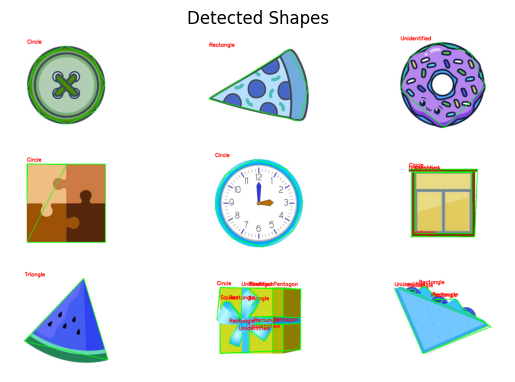

In [18]:
img = cv2.imread("/content/imges.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    # Calculate the contour perimeter
    peri = cv2.arcLength(cnt, True)

    # Approximate the polygon
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)

    x, y, w, h = cv2.boundingRect(approx)

    # Determine the shape based on the number of sides
    shape = "Unidentified"
    sides = len(approx)

    if sides == 3:
        shape = "Triangle"
    elif sides == 4:
        aspect_ratio = w / float(h)
        shape = "Square" if 0.95 < aspect_ratio < 1.05 else "Rectangle"
    elif sides == 5:
        shape = "Pentagon"
    elif sides > 6:
        shape = "Circle"

    # Draw the shape name on the image
    cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)
    cv2.putText(img, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

plt.imshow(img)
plt.axis("off")
plt.title("Detected Shapes")
plt.show()

# Face Detection with *Haar Cascade* OpenCV

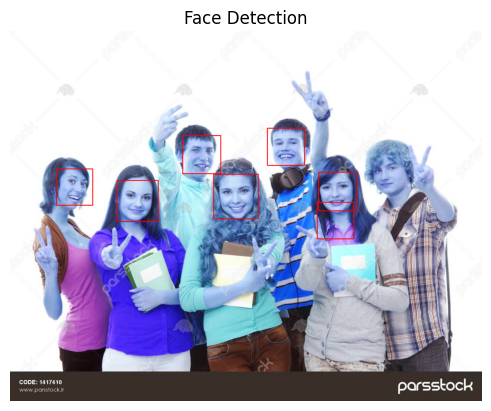

In [30]:
# import cv2

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the input image
my_img = cv2.imread('/content/image_p.jpg')

# Convert the image to grayscale (improves detection accuracy)
gray = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10)

# Draw bounding boxes around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(my_img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the output image with detected faces
plt.imshow(my_img)
plt.axis("off")
plt.title("Face Detection")
plt.show()

# Face detection using the DNN model in OpenCV (more accurate than Haar cascades)

# Load model

In [27]:
modelfile = "/content/deploy.prototxt"
configFile = "/content/res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNetFromCaffe(modelfile, configFile)

# Face detection on a  image

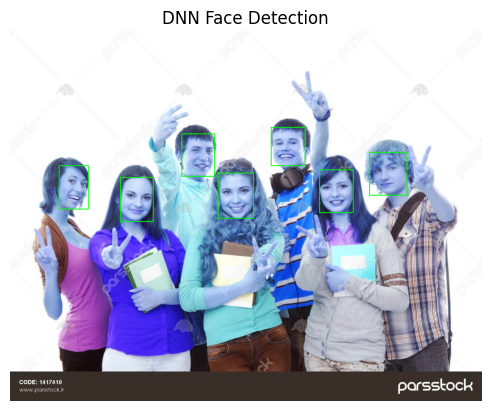

In [28]:
image_p = cv2.imread("/content/image_p.jpg")
(h, w) = image_p.shape[:2]

# tuning model
blob = cv2.dnn.blobFromImage(cv2.resize(image_p, (300, 300)), 1.0,
                             (300, 300), (104.0, 177.0, 123.0))

net.setInput(blob)
detections = net.forward()

# Draw bounding boxes around detected faces
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * [w, h, w, h]
        (x1, y1, x2, y2) = box.astype("int")
        cv2.rectangle(image_p, (x1, y1), (x2, y2), (0, 255, 0), 2)


plt.imshow(image_p)
plt.axis("off")
plt.title("DNN Face Detection")
plt.show()

# Comparing two models

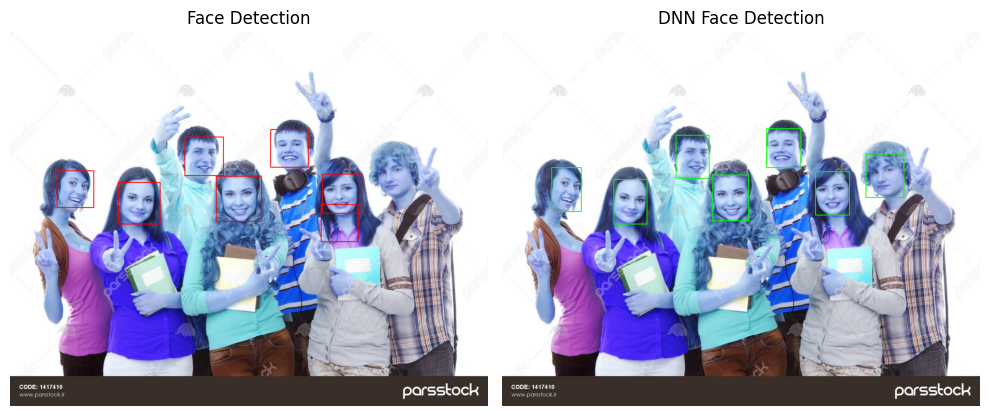

In [31]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(my_img)
plt.title("Face Detection")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_p)
plt.title("DNN Face Detection")
plt.axis('off')

plt.tight_layout()
plt.show()